<a href="https://colab.research.google.com/github/Ruchika810/ML-Classification/blob/main/Cardiovascular_Risk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The dataset is from an ongoing cardiovascular study on residents of the town of Framingham, 
Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of
future coronary heart disease (CHD). The dataset provides the patients’ information. It includes
over 4,000 records and 15 attributes.                                                                                                                                                                                           
Variables                                                              
Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk
factors.                                                                
Data Description                                                        
Demographic:                                                           
• Sex: male or female("M" or "F")                                      
• Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to
whole numbers, the concept of age is continuous)                        
Behavioral
• is_smoking: whether or not the patient is a current smoker ("YES" or "NO")                                                               
                                                                      • Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be
considered continuous as one can have any number of cigarettes, even half a cigarette.)                                                                                                                          
Medical( history)
• BP Meds: whether or not the patient was on blood pressure medication (Nominal)                                                     
• Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)                                                              
• Prevalent Hyp: whether or not the patient was hypertensive (Nominal)                                                              
• Diabetes: whether or not the patient had diabetes (Nominal)
Medical(current)                                                              
• Tot Chol: total cholesterol level (Continuous)                       
• Sys BP: systolic blood pressure (Continuous)                         
• Dia BP: diastolic blood pressure (Continuous)                        
• BMI: Body Mass Index (Continuous)                                    
• Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in
fact discrete, yet are considered continuous because of large number of possible values.)                                                   
• Glucose: glucose level (Continuous)                                  
Predict variable (desired target)                                       
• 10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”)                                                      -
DV

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd

from sklearn.impute import KNNImputer

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

#Reading and Understanding data

In [2]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/data_cardiovascular_risk.csv', encoding= 'unicode_escape',parse_dates=True)

In [4]:
# Exploring the first five rows of the dataset
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [5]:
# Exploring the last five rows of the dataset
df.tail()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0
3389,3389,54,3.0,F,NO,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.0,0


In [6]:
# Inspecting the length and number of columns of the dataset
df.shape

(3390, 17)

In [7]:
# Checking null values and data types of each columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [8]:
#Null Values
df.isnull().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [9]:
# duplicate
print(df[df.duplicated()].sum())

id                 0.0
age                0.0
education          0.0
sex                0.0
is_smoking         0.0
cigsPerDay         0.0
BPMeds             0.0
prevalentStroke    0.0
prevalentHyp       0.0
diabetes           0.0
totChol            0.0
sysBP              0.0
diaBP              0.0
BMI                0.0
heartRate          0.0
glucose            0.0
TenYearCHD         0.0
dtype: float64


In [10]:
# Finding statistical measures of numerical columns
df.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


#Exploratory Data Analysis

In [11]:
# Extracting names of numerical columns from the data
numeric_features = df.describe().columns
numeric_features

Index(['id', 'age', 'education', 'cigsPerDay', 'BPMeds', 'prevalentStroke',
       'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI',
       'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

##Visualization of Numerical Features

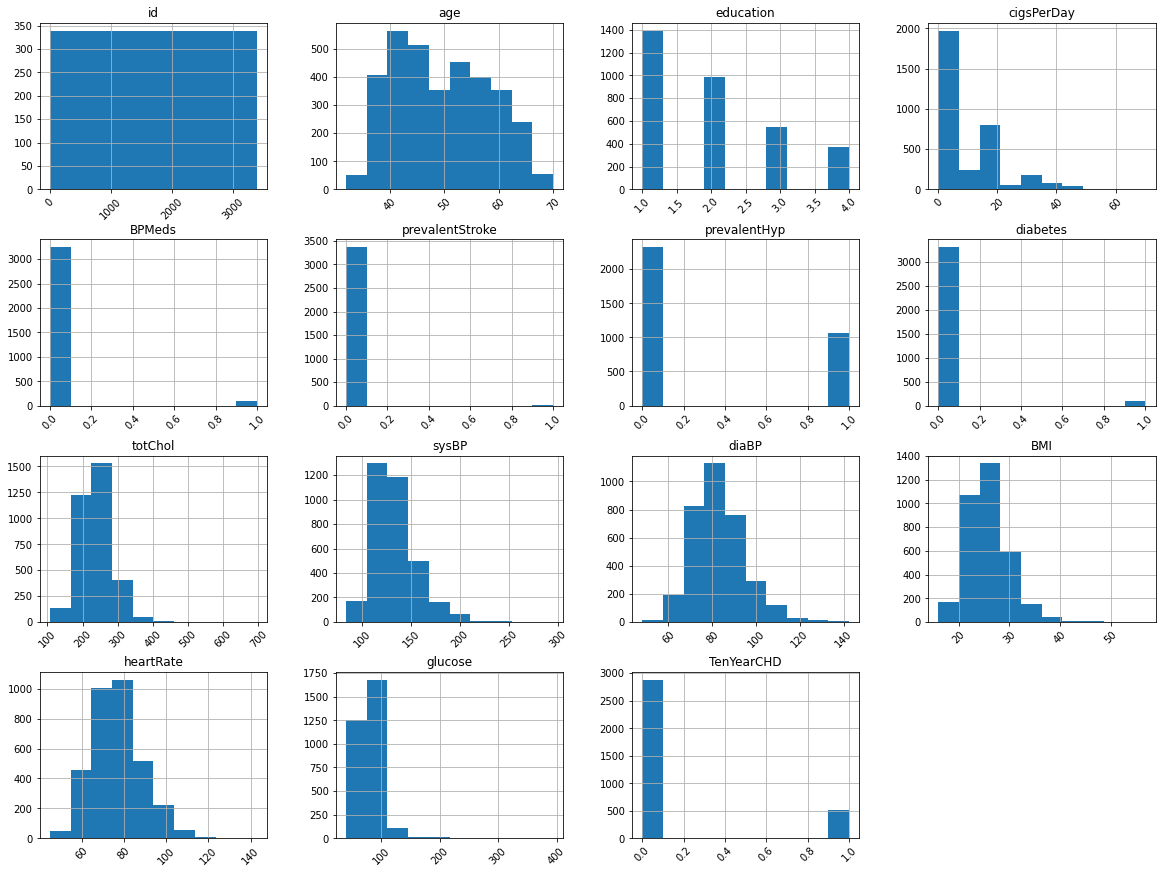

In [12]:
df.hist(figsize = (20,15),xrot=45)
plt.show()

##Visualization Of Categorical Features

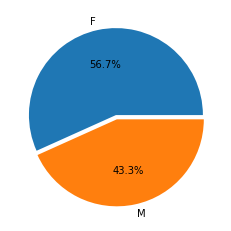

In [13]:
#Create a pie chart 
plt.pie(df['sex'].value_counts(), labels=df['sex'].value_counts().keys(),explode=(0,0.05),autopct='%.1f%%')
plt.show()

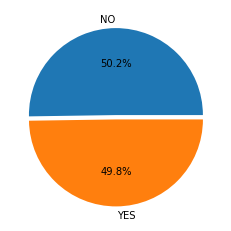

In [14]:
#Create a pie chart 
plt.pie(df['is_smoking'].value_counts(), labels=df['is_smoking'].value_counts().keys(),explode=(0,0.05),autopct='%.1f%%')
plt.show()

In [15]:
# Extracting names of categorical columns from the data
categorical_features = df.describe(include=['object','category']).columns
categorical_features

Index(['sex', 'is_smoking'], dtype='object')

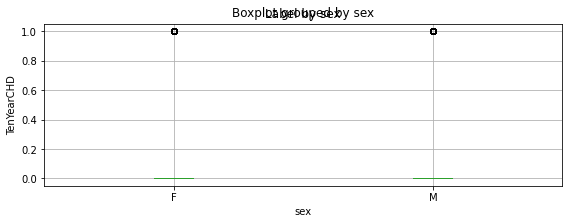

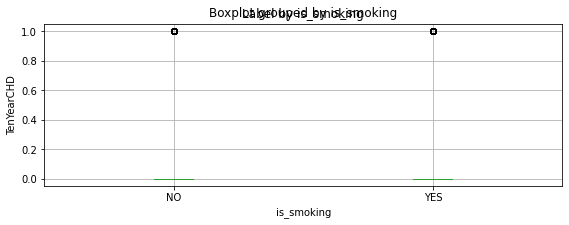

In [16]:
# Box plot of categorical features with respect to dependent variable
for col in categorical_features:
    fig = plt.figure(figsize=(9, 3))
    ax = fig.gca()
    df.boxplot(column = 'TenYearCHD', by = col, ax = ax)
    ax.set_title('Label by ' + col)
    ax.set_ylabel("TenYearCHD")
plt.show()

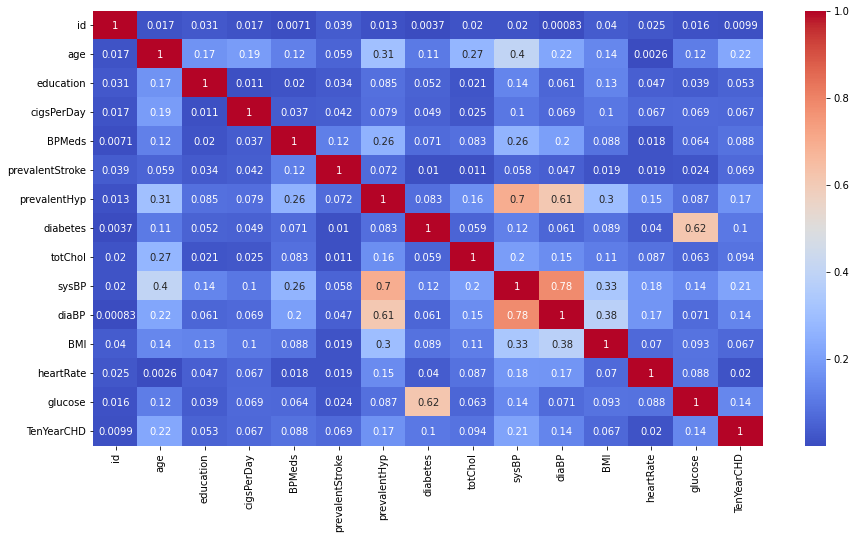

In [17]:
## Correlation matrix
plt.figure(figsize=(15,8))
correlation = df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')
plt.show()